In [25]:
ol_names=[]
def create_train_data(k,m):
    lst=[]
    sum=0
    weights=[]
    
    for i in range(k):
        col_names.append("X"+str(i+1))
    col_names.append("Y")    
    
    
    for u in range(1,k):
        sum+=pow(0.9,u)
    for u in range(1,k):
        weights.append(pow(0.9,i)/sum)
        
    
    
        
    for i in range(m):
        weighted_avg=0
        
        l=[]
        l.append(random.randint(0,1))
        for j in range(1,k):
            x=random.random()
            if x<0.25:
                l.append(1-l[-1])
            else:
                l.append(l[-1])
            
            
        
        for b in range(len(weights)):
            weighted_avg=l[b+1]*weights[b]
        if weighted_avg>=0.5:
            l.append(l[0])
        else:
            l.append(1-l[0])
        lst.append(l)
    return pd.DataFrame(lst,columns=col_names)
import random
import numpy as np
def data_generator(features, data_points):
    data = np.zeros((data_points,features),dtype =np.int8)
    Y = np.zeros(data_points)

    for i in range(data_points):

        data[i][0] = random.choice([0,1])

        for k in range(1,features):

            choices = [data[i][k-1],1-data[i][k-1]]

            prob = [0.75,0.25]

            data[i][k] = np.random.choice(choices,p=prob)

    weights = np.zeros(features)
    sum = 0
    for i in range(2,features+1):

        sum+= pow(0.9,i)

    for j in range(2,features+1):

        weights[j-1] = pow(0.9,j)/sum

    weights[0]= 0


    for i in range(data_points):

        weighted_average = 0

        for b in range(0,k+1):

            weighted_average += data[i][b] * weights[b]


        if weighted_average >= 0.5:

            Y[i] = data[i][0]

        else:

            Y[i] = 1 - data[i][0]

    return[data, Y]

data_xy=data_generator(4,300)



In [26]:
import numpy as np
def partition(a):
    return {c: (a==c).nonzero()[0] for c in np.unique(a)}
def entropy(s):
    res = 0
    val, counts = np.unique(s, return_counts=True)
    freqs = counts.astype('float')/len(s)
    for p in freqs:
        if p != 0.0:
            res -= p * np.log2(p)
    return res
def mutual_information(y, x):
    res = entropy(y)
    val, counts = np.unique(x, return_counts=True)
    freqs = counts.astype('float')/len(x)
    for p, v in zip(freqs, val):
        res -= p * entropy(y[x == v])

    return res
from pprint import pprint

def is_pure(s):
    return len(set(s)) == 1

def recursive_split(x, y):
    gain = np.array([mutual_information(y, x_attr) for x_attr in x.T])
    selected_attr = np.argmax(gain)
    if np.all(gain < 1e-6):
        return y
    sets = partition(x[:, selected_attr])

    res = {}
    for k, v in sets.items():
        y_subset = y.take(v, axis=0)
        x_subset = x.take(v, axis=0)
        res["x_%d = %d" % (selected_attr, k)] = recursive_split(x_subset, y_subset)
        

    return res

#X = np.array([x1, x2]).T
y=np.array([1,0,0,1,0,0,1,1,0,1])
dict_tree=recursive_split(data_xy[0],data_xy[1])

In [38]:
Test_data = data_generator(4,1000)
lst=[]
X_test_data = Test_data[0]
Y_test_data = Test_data[1]
Y_pred = []
for item in X_test_data:
    temp_dict = recursive_split(data_xy[0],data_xy[1])
    while(type(temp_dict) is dict):
        key_list = []
        for j in temp_dict.keys():
            key_list.append(j)
        #print(key_list)
        feat = key_list[0][2]
        temp = item[int(feat)]
        temp_dict = temp_dict[key_list[temp]] 
        #print(temp_dict)
    Y_pred.append(temp_dict[0])
count = 0
for i in range(len(X_test_data)):
    if Y_pred[i] != Y_test_data[i]:
        count +=1
        
temp_error = count/len(X_test_data)
lst.append(temp_error)
        
error_dict[1]=sum(lst)/10

In [39]:
lst

[0.0]

In [5]:
error_dict={}
Test_data = data_generator(10,100)
def error_calc(m):
    
    
    for i in range(10):
        lst=[]
        
        data_xy=data_generator(10,m)
    
        
        X_test_data = Test_data[0]
        Y_test_data = Test_data[1]
        Y_pred = []
        for item in X_test_data:
            temp_dict = recursive_split(data_xy[0],data_xy[1])
            while(type(temp_dict) is dict):
                key_list = []
                for j in temp_dict.keys():
                    key_list.append(j)
        #print(key_list)
                feat = key_list[0][2]
                temp = item[int(feat)]
                temp_dict = temp_dict[key_list[temp]] 
        #print(temp_dict)
            Y_pred.append(temp_dict[0])
        count = 0
        for i in range(len(X_test_data)):
            if Y_pred[i] != Y_test_data[i]:
                count +=1
        
        temp_error = count/len(X_test_data)
        lst.append(temp_error)
        
    error_dict[m]=sum(lst)/10

In [27]:
error_dict

{25: 0.039,
 50: 0.019,
 75: 0.017,
 100: 0.014000000000000002,
 125: 0.009,
 150: 0.012,
 175: 0.01,
 200: 0.01,
 225: 0.013000000000000001,
 250: 0.006,
 275: 0.007000000000000001,
 300: 0.011,
 325: 0.013000000000000001,
 350: 0.006,
 375: 0.009,
 400: 0.007000000000000001,
 425: 0.006,
 450: 0.005,
 475: 0.005,
 500: 0.007000000000000001,
 525: 0.004,
 550: 0.005,
 575: 0.004,
 600: 0.007000000000000001,
 625: 0.006,
 650: 0.007000000000000001,
 675: 0.004,
 700: 0.002,
 725: 0.003,
 750: 0.005,
 775: 0.003,
 800: 0.002,
 825: 0.003,
 850: 0.004,
 875: 0.005,
 900: 0.001,
 925: 0.004,
 950: 0.006,
 975: 0.005,
 1: 0.26299999999999996}

In [14]:
from statistics import mean 
from tqdm import tqdm
error_dict={}

x=[]
for i in tqdm(range(25,1000,25)):
    error_calc(i)
error_dict
        
        

100%|██████████| 39/39 [1:21:45<00:00, 146.27s/it]


{25: 0.039,
 50: 0.019,
 75: 0.017,
 100: 0.014000000000000002,
 125: 0.009,
 150: 0.012,
 175: 0.01,
 200: 0.01,
 225: 0.013000000000000001,
 250: 0.006,
 275: 0.007000000000000001,
 300: 0.011,
 325: 0.013000000000000001,
 350: 0.006,
 375: 0.009,
 400: 0.007000000000000001,
 425: 0.006,
 450: 0.005,
 475: 0.005,
 500: 0.007000000000000001,
 525: 0.004,
 550: 0.005,
 575: 0.004,
 600: 0.007000000000000001,
 625: 0.006,
 650: 0.007000000000000001,
 675: 0.004,
 700: 0.002,
 725: 0.003,
 750: 0.005,
 775: 0.003,
 800: 0.002,
 825: 0.003,
 850: 0.004,
 875: 0.005,
 900: 0.001,
 925: 0.004,
 950: 0.006,
 975: 0.005}

In [ ]:
error_dict

In [9]:

error_dict

{10: 0.027000000000000003, 300: 0.008}

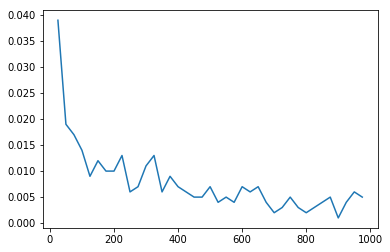

In [15]:
import matplotlib.pylab as plt
lists = sorted(error_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) #
plt.plot(x, y)
plt.show()

In [42]:
error_dict={}
error_calc(4)

In [43]:
error_dict

{4: 0.034}